# plt.subplot

## №1
[original](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [3]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Text(0.5, 1.0, 'A single plot')

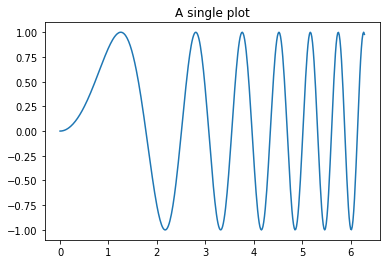

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

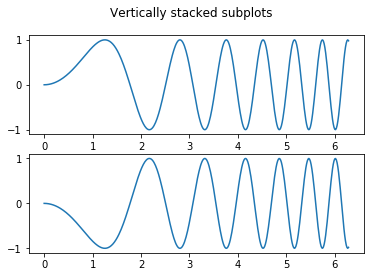

In [5]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

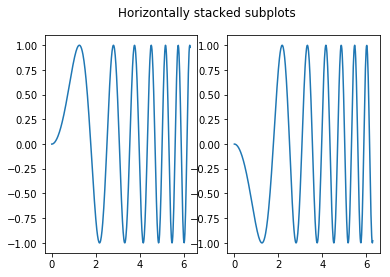

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

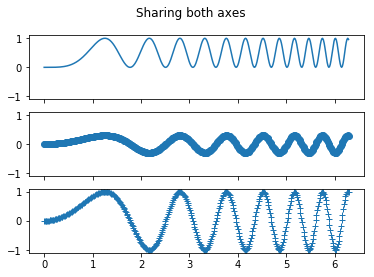

In [7]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

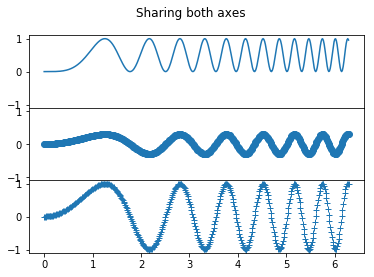

In [8]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

## №2


In [9]:
data = {'ColB': {('A', 4): 3.0,
                 ('C', 2): 0.0,
                 ('B', 4): 51.0,
                 ('B', 1): 0.0,
                 ('C', 3): 0.0,
                 ('B', 2): 7.0,
                 
                 ('Code', 'Month'): '',
                 ('A', 3): 5.0,
                 ('C', 1): 0.0,
                 ('C', 4): 0.0,
                 ('B', 3): 12.0},
        
        'ColA': {('A', 4): 66.0,
                 ('C', 2): 5.0,
                 ('B', 4): 125.0,
                 ('B', 1): 5.0,
                 ('C', 3): 41.0,
                 ('B', 2): 52.0,
                 
                 ('Code', 'Month'): '',
                 ('A', 3): 22.0,
                 ('C', 1): 14.0,
                 ('C', 4): 51.0,
                 ('B', 3): 122.0}}

df = pd.DataFrame(data) 
df

ColB ColA
A    3        5   22
     4        3   66
B    1        0    5
     2        7   52
     3       12  122
     4       51  125
C    1        0   14
     2        0    5
     3        0   41
     4        0   51
Code Month

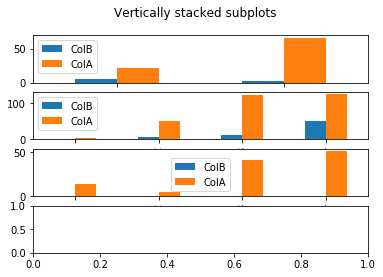

In [10]:
f, a = plt.subplots(4,1)

f.suptitle('Vertically stacked subplots')
    
df.xs('A').plot(kind='bar',ax=a[0])

df.xs('B').plot(kind='bar',ax=a[1])

df.xs('C').plot(kind='bar',ax=a[2]) 

## №3

In [19]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


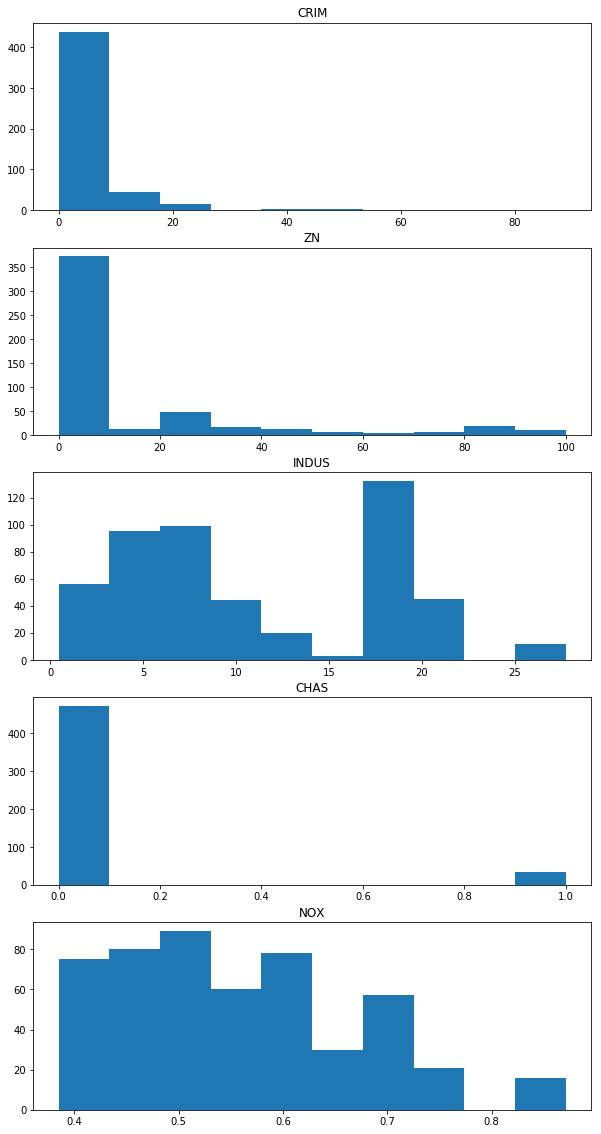

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,20

# выведем частотность первыех 5-и характеристик
fig, axs = plt.subplots(5,1)
for i in names[:5]:
    axs[names.index(i)].hist(data[i])
    axs[names.index(i)].set_title(i)

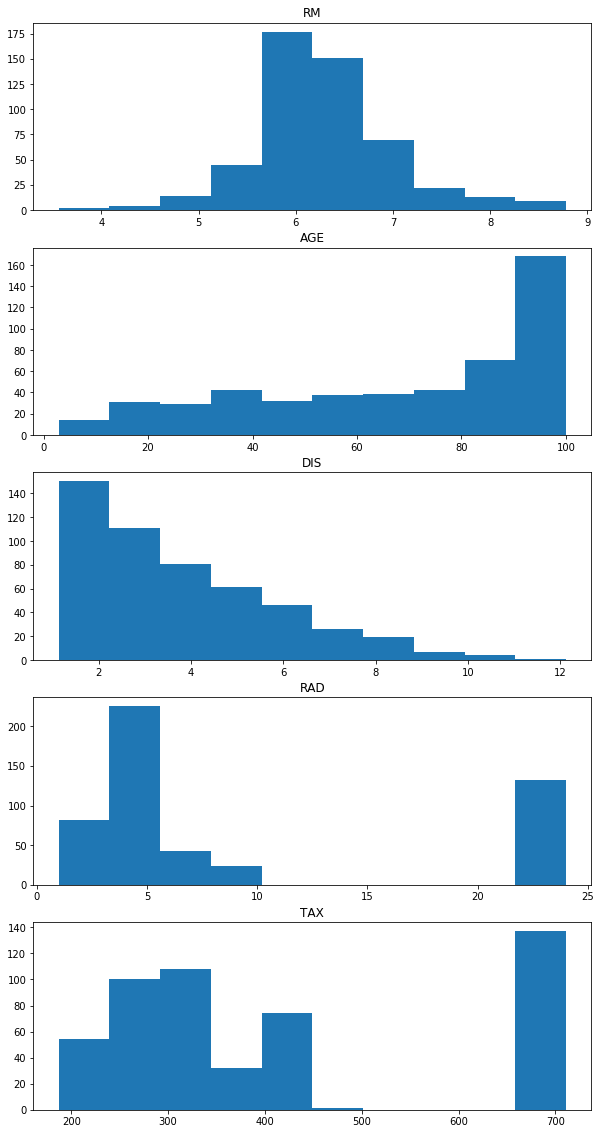

In [21]:
# выведем частотность характеристик с 6 по 10ую:
fig, axs = plt.subplots(5,1)
for i in names[5:10]:
    
    axs[names.index(i)-5].hist(data[i])
    axs[names.index(i)-5].set_title(i)

## №4
[more about gridspec](https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html)

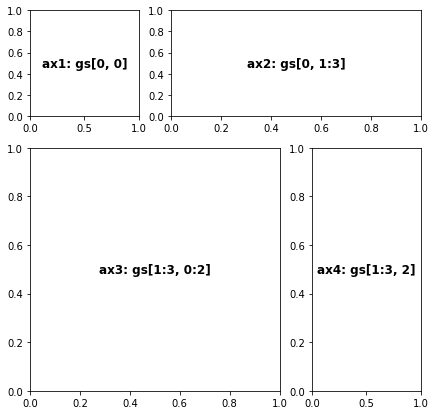

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
plt.show()

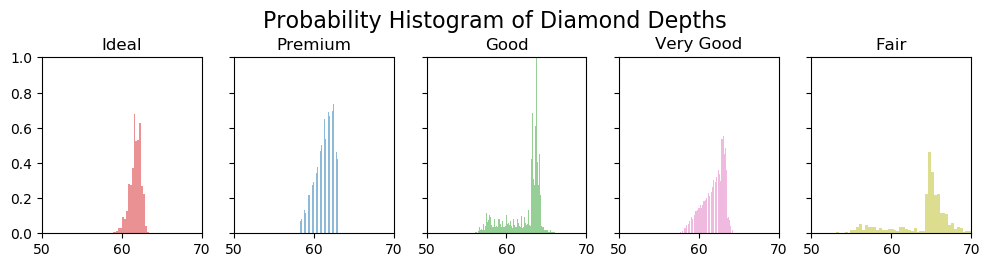

In [24]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')

# Plot
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, cut) in enumerate(zip(axes.flatten(), df.cut.unique())):
    x = df.loc[df.cut==cut, 'depth']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout();

[original](https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/)